# Applying SMOTE for Imbalanced Datasets

## Introduction
In order to address the class imbalance in the combined datasets for archer, camera, and indoor IoT devices, the Synthetic Minority Over-sampling Technique (SMOTE) will be applied. This method generates synthetic samples to increase the representation of the minority class, thereby improving the performance of machine learning models.

## Required Libraries
Before running the script, ensure the following libraries are installed:



C:\Users\USER\AppData\Local\Temp\ipykernel_38656\239607252.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_before, palette=colors)  # Use custom colors for each device
C:\Users\USER\AppData\Local\Temp\ipykernel_38656\239607252.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_after, palette=colors)  # Same colors for consistency


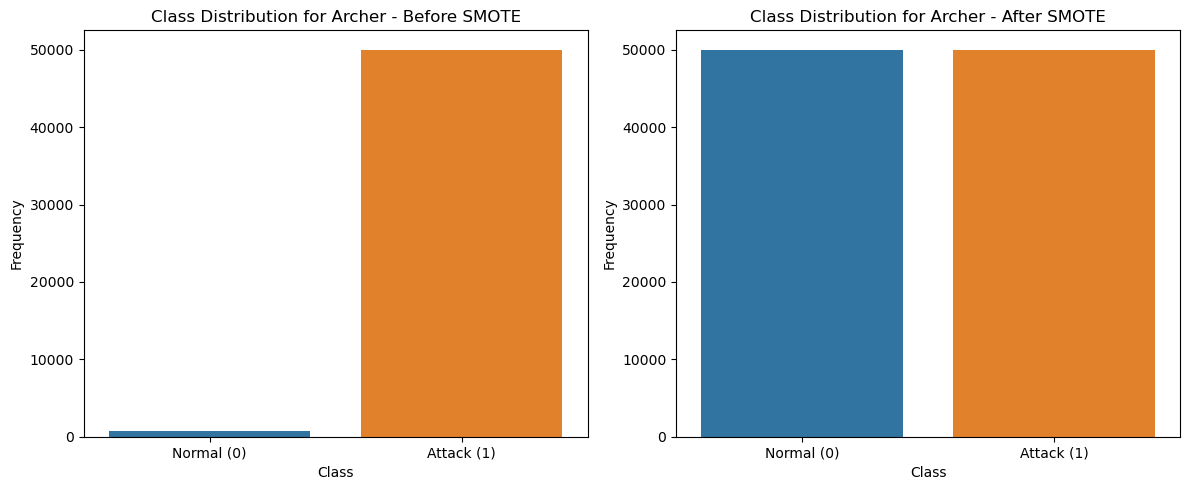

C:\Users\USER\AppData\Local\Temp\ipykernel_38656\239607252.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_before, palette=colors)  # Use custom colors for each device
C:\Users\USER\AppData\Local\Temp\ipykernel_38656\239607252.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_after, palette=colors)  # Same colors for consistency


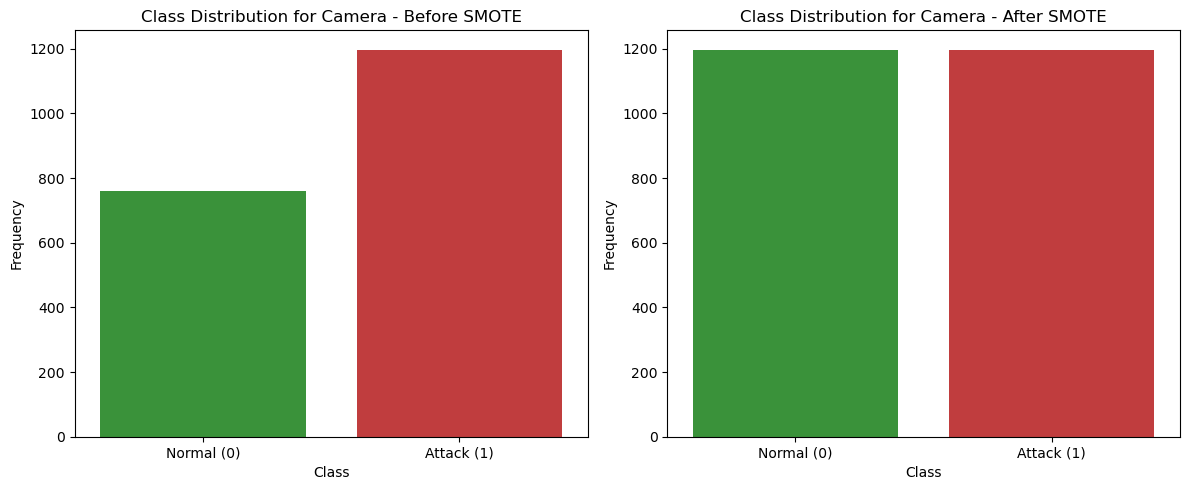

C:\Users\USER\AppData\Local\Temp\ipykernel_38656\239607252.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_before, palette=colors)  # Use custom colors for each device
C:\Users\USER\AppData\Local\Temp\ipykernel_38656\239607252.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_after, palette=colors)  # Same colors for consistency


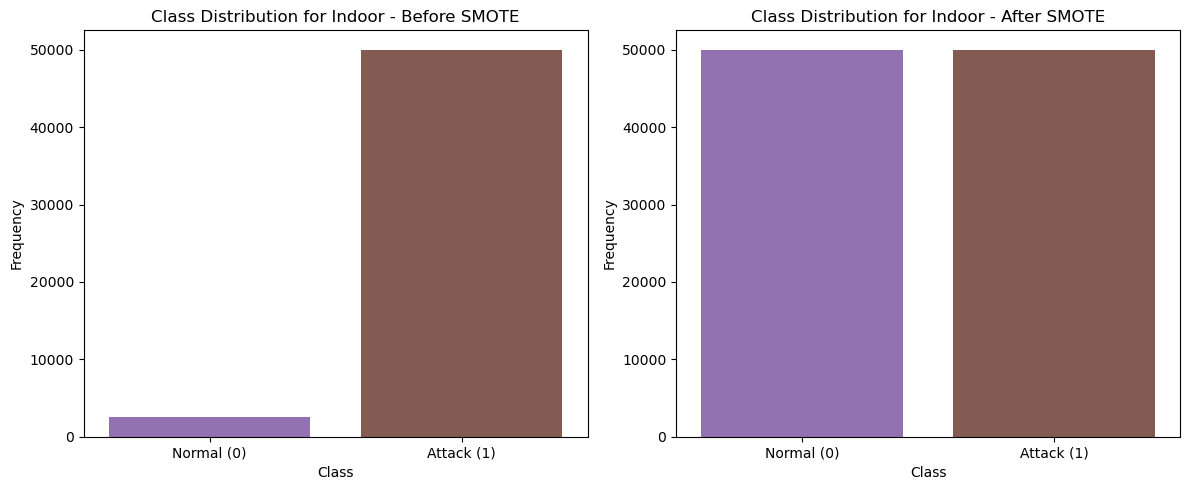

SMOTE has been applied, and balanced datasets have been saved.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import os

# Define file paths
file_paths = {
    'archer': r'C:\Users\USER\IoT_Network_Traffic_Management\data\processed_data\processed_archer.csv',
    'camera': r'C:\Users\USER\IoT_Network_Traffic_Management\data\processed_data\processed_camera.csv',
    'indoor': r'C:\Users\USER\IoT_Network_Traffic_Management\data\processed_data\processed_indoor.csv'
}

# Define the output path for balanced datasets
balanced_output_dir = r'C:\Users\USER\IoT_Network_Traffic_Management\data\balanced'
os.makedirs(balanced_output_dir, exist_ok=True)  # Create directory if it doesn't exist

# Function to visualize class distribution side by side
def visualize_class_distribution(y_before, y_after, title, colors):
    plt.figure(figsize=(12, 5))

    # Subplot for before SMOTE
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_before, palette=colors)  # Use custom colors for each device
    plt.title(f'{title} - Before SMOTE')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks([0, 1], ['Normal (0)', 'Attack (1)'])

    # Subplot for after SMOTE
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_after, palette=colors)  # Same colors for consistency
    plt.title(f'{title} - After SMOTE')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks([0, 1], ['Normal (0)', 'Attack (1)'])

    plt.tight_layout()
    plt.show()

# Function to apply SMOTE and save the balanced dataset
def apply_smote_and_save(device_name):
    # Load combined dataset
    data = pd.read_csv(file_paths[device_name])
    
    # Separate features and target variable
    X = data.drop('label', axis=1)  # Assuming 'label' is the target variable
    y = data['label']
    
    # Visualize class distribution before SMOTE
    y_before = y.copy()  # Keep original labels for before SMOTE visualization

    # Initialize SMOTE
    smote = SMOTE(random_state=42)
    
    # Apply SMOTE
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled features and target
    balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_data['label'] = y_resampled
    
    # Save the balanced dataset
    balanced_data.to_csv(os.path.join(balanced_output_dir, f'balanced_{device_name}.csv'), index=False)

    # Define colors for each device
    colors = {
        'archer': ['#1f77b4', '#ff7f0e'],  # Blue and Orange for Archer
        'camera': ['#2ca02c', '#d62728'],  # Green and Red for Camera
        'indoor': ['#9467bd', '#8c564b']   # Purple and Brown for Indoor
    }
    
    # Visualize class distribution before and after SMOTE
    visualize_class_distribution(y_before, y_resampled, f'Class Distribution for {device_name.capitalize()}', colors[device_name])

# Apply SMOTE for each device
for device in ['archer', 'camera', 'indoor']:
    apply_smote_and_save(device)

print("SMOTE has been applied, and balanced datasets have been saved.")
